In [1]:
import numpy as np
from numpy import sin, sqrt, pi, exp
from scipy.integrate import odeint, solve_ivp
from scipy.interpolate import BSpline
from matplotlib import pyplot as plt

In [2]:
def adjustSlice(xi, xf):    #adjusts the slice (xi - xf), returns newx and newy
    #convert time you want to start & end at into index
    xi = int(xi/dt)
    xf = int(xf/dt)
    #grab Noise slice and associated time slice
    y = Ns[xi:xf]
    x = ts[xi:xf]
    #calculate average
    mean = np.average(y)
    #adjust noise by mean so new mean ~ 0
    y = y - mean
    return y, x

In [3]:
def ode(v, t, c1, cn, p0):
    #the dependent variables are updated first
    p = p0/(sigma*sqrt(2*pi))*exp(-pow(t-t0, 2)/(2*pow(sigma,2)))
    x1, y1, x2, y2, x3, y3 = v
    #then the oscillators are calculated and updated in the Z array
    Z = [y1, - g1*y1 - sin(x1) + c1 + k12*(x2-x1) + cn*N1[int((t-81)/dt)] + p,
         y2, - g2*y2 - sin(x2) + C2 + k12*(x1-x2) + k23*(x3-x2), 
         y3, - g3*y3 - sin(x3) + C3 + k23*(x2-x3)]
    return Z

In [4]:
def ivp(t, v, c1, cn, p0):
    #the dependent variables are updated first
    p = p0/(sigma*sqrt(2*pi))*exp(-pow(t-t0, 2)/(2*pow(sigma,2)))
    x1, y1, x2, y2, x3, y3 = v
    #then the oscillators are calculated and updated in the Z array
    Z = [y1, - g1*y1 - sin(x1) + c1 + k12*(x2-x1) + cn*N1[int((t-81)/dt)] + p,
         y2, - g2*y2 - sin(x2) + C2 + k12*(x1-x2) + k23*(x3-x2), 
         y3, - g3*y3 - sin(x3) + C3 + k23*(x2-x3)]
    return Z

In [5]:
##Initial conditons [x1, y1, x2, y2, x3, y3]
IC = [39.7, 0.0, 20.4, 0.0, 1.3, 0.0]
#Constants [gamma1,2,3, C1,2,3, kappa12,23]
g1, g2, g3, C2, C3, k12, k23 = [0.7, 1.1, 0.7, 0.8, -1.0, 0.1, 0.1]

#Modifiables
sigma = 10   #pulse spread (wavelength)
t0 = 100     #pulse midpoint time

In [6]:
#Read Noise data from file
data = np.genfromtxt('Noise.dat')
t = data[:,0]
Nt = data[:,1]

#Interpolate Noise data
dt = 0.01
ts = np.arange(0, 500, dt)
#grab interpolation class
S = BSpline(t, Nt, 2)
Ns = S(ts)

#Grab slice and multiply by noise volume
N1, t1 = adjustSlice(80, 120)
tnew = np.arange(80, 120, dt)
print(t1)

[ 80.    80.01  80.02 ... 119.97 119.98 119.99]


In [7]:
Cn = 0.5
P0 = 2.6
C1 = 2.84

In [8]:
z1 = odeint(ode, IC, tnew, (C1,Cn,P0))

In [9]:
z2 = solve_ivp(ivp, [tnew[0], tnew[-1]], IC, t_eval=tnew, args=(C1,Cn,P0), dense_output=True)

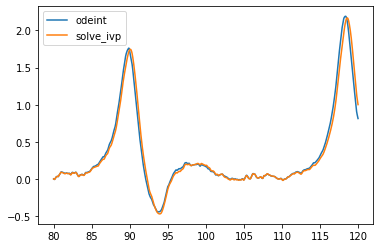

In [10]:
plt.plot(t1, z1[:,1], label='odeint')
plt.plot(t1, z2.y[1], label='solve_ivp')
plt.legend()
#plt.xlim(90, 100)

plt.show()